<a href="https://colab.research.google.com/github/maya-papaya/ads1-cervical-cancer-analysis/blob/main/Analysis%2C%20Exploration%2C%20%26%20Visualization%20(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis, Exploration, and Visualization (4)

### Preparing Notebook

In [1]:
# SETTING UP COLAB, MODULES, AND DATABASE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import os
import warnings
import time

from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/ADS_Maya_Reddy/projects/disease_project_1/prepped_datasets/")
warnings.filterwarnings('ignore')

con = sqlite3.connect('cervical_cancer.db')

Mounted at /content/drive


### Incidence / Mortality Rates Over Time

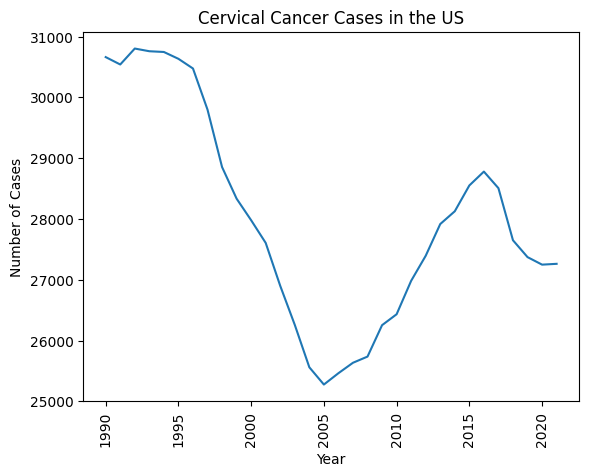

In [63]:
# INCIDENCE COUNTS IN US OVER TIME
query = "SELECT year, SUM(inc_count) AS overall_inc FROM data GROUP BY year ORDER BY year ASC;"
inc_counts = pd.read_sql(query, con)

plt.title("Cervical Cancer Cases in the US")
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.plot(inc_counts['year'], inc_counts['overall_inc'])
plt.xticks(rotation='vertical')
plt.show()

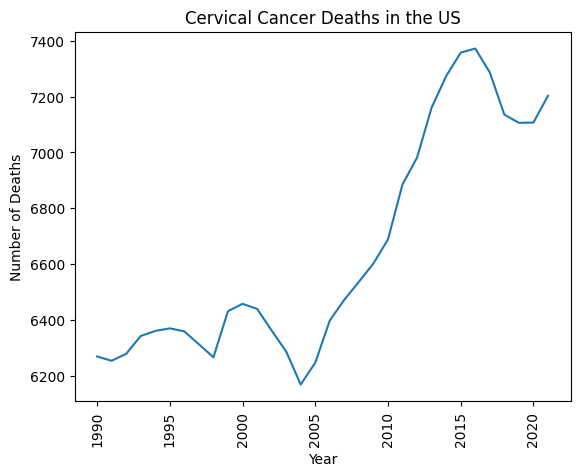

In [64]:
# MORTALITY COUNTS IN US OVER TIME
query = "SELECT year, SUM(mort_count) AS overall_mort FROM data GROUP BY year ORDER BY year ASC;"
mort_counts = pd.read_sql(query, con)

plt.title("Cervical Cancer Deaths in the US")
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.plot(mort_counts['year'], mort_counts['overall_mort'])
plt.xticks(rotation='vertical')
plt.show()

Please enter in a US state (type "quit" to exit): Alabama


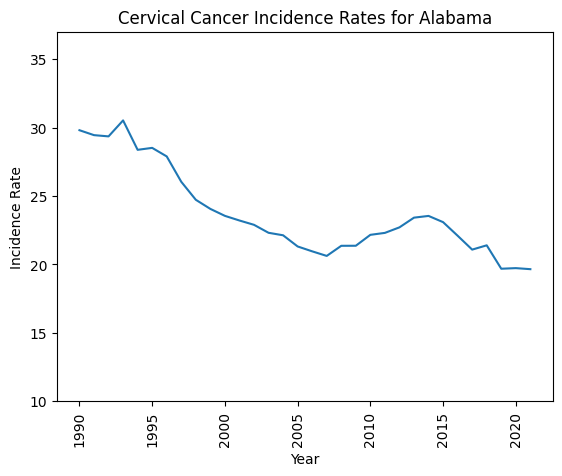

Please enter in a US state (type "quit" to exit): quit


In [2]:
# INCIDENCE RATE GRAPHS BY STATE OVER TIME
state = input('Please enter in a US state (type "quit" to exit): ')

while state != "quit":
  query = "SELECT state, year, inc_rate FROM data WHERE state = '" + str(state) + "' ORDER BY year ASC;"
  inc_rates = pd.read_sql(query, con)

  plt.title("Cervical Cancer Incidence Rates for " + str(state))
  plt.xlabel('Year')
  plt.ylabel('Incidence Rate')
  plt.ylim(10, 37)
  plt.plot(inc_rates['year'], inc_rates['inc_rate'])
  plt.xticks(rotation='vertical')
  plt.show()

  time.sleep(2)

  state = input('Please enter in a US state (type "quit" to exit): ')

Please enter in a US state (type "quit" to exit): Alabama


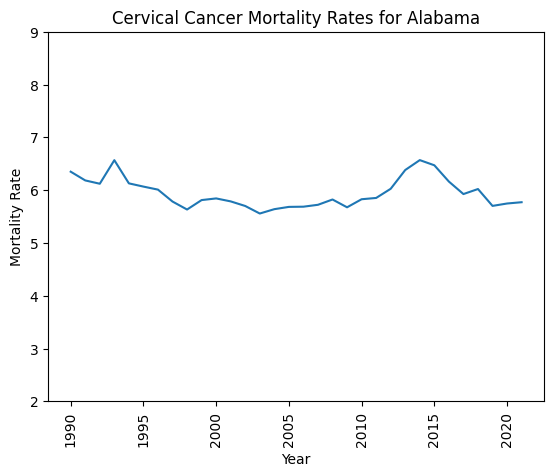

Please enter in a US state (type "quit" to exit): quit


In [3]:
# MORTALITY RATE GRAPHS BY STATE OVER TIME
state = input('Please enter in a US state (type "quit" to exit): ')

while state != "quit":
  query = "SELECT state, year, mort_rate FROM data WHERE state = '" + str(state) + "' ORDER BY year ASC;"
  mort_rates = pd.read_sql(query, con)

  plt.title("Cervical Cancer Mortality Rates for " + str(state))
  plt.xlabel('Year')
  plt.ylabel('Mortality Rate')
  plt.ylim(2, 9)
  plt.plot(mort_rates['year'], mort_rates['mort_rate'])
  plt.xticks(rotation='vertical')
  plt.show()

  time.sleep(2)

  state = input('Please enter in a US state (type "quit" to exit): ')

<Figure size 1000x600 with 0 Axes>

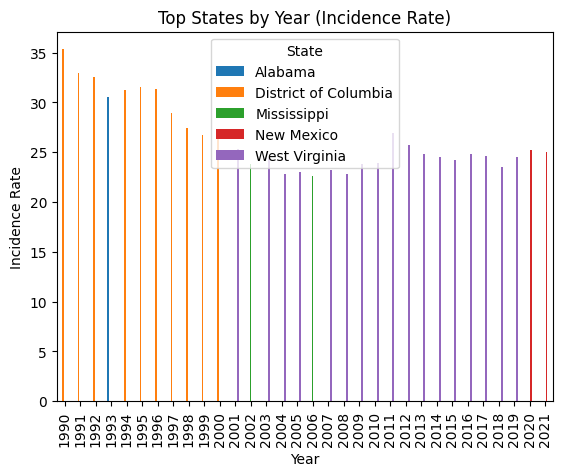

In [51]:
# STATE WITH HIGHEST INCIDENCE RATE BY YEAR
query = "SELECT state, year, inc_rate FROM data GROUP BY year, state ORDER BY state DESC;"
state_inc_rates = pd.read_sql(query, con)
top_state_by_year = state_inc_rates.loc[state_inc_rates.groupby('year')["inc_rate"].idxmax()]
pd.pivot_table(top_state_by_year,
                  values="inc_rate",
                  index="year",
                  columns="state",
                  aggfunc=sum).plot.bar()
plt.title("Top States by Year (Incidence Rate)")
plt.xlabel("Year")
plt.ylabel("Incidence Rate")
plt.legend(title='State')
plt.show()

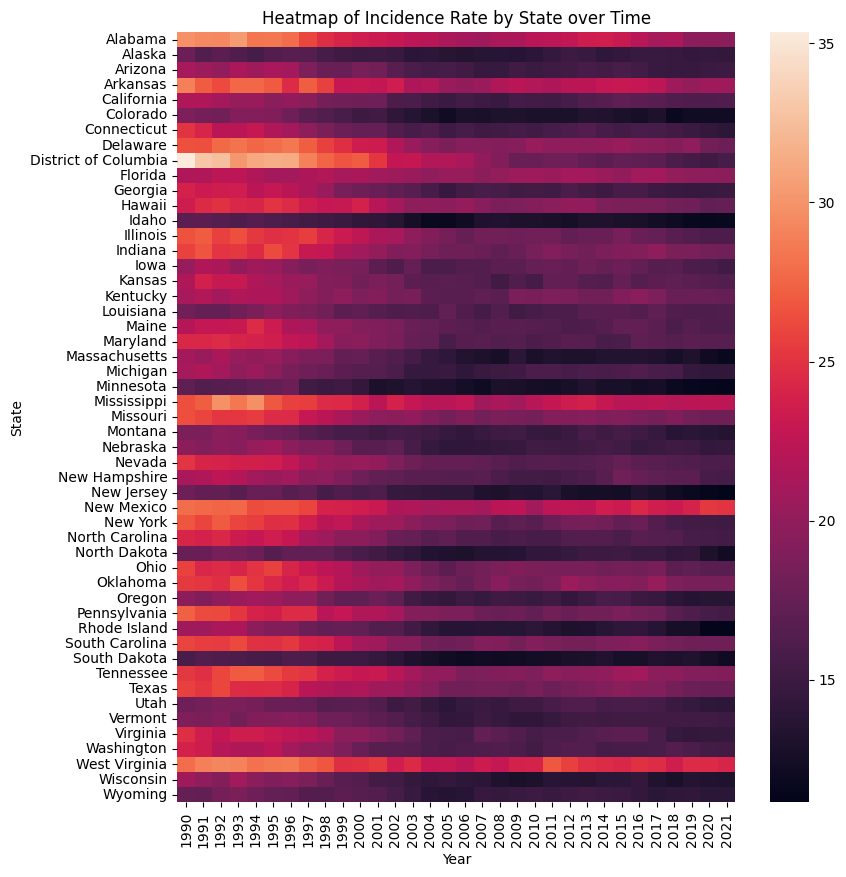

In [55]:
# INCIDENCE RATE BY STATE OVER TIME
query = "SELECT state, year, inc_rate FROM data ORDER BY year ASC;"
inc_rates = pd.read_sql(query, con)

plt.figure(figsize=(9, 10))
sns.heatmap(inc_rates.pivot(index='state', columns=['year'], values='inc_rate'))
plt.title('Heatmap of Incidence Rate by State over Time')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

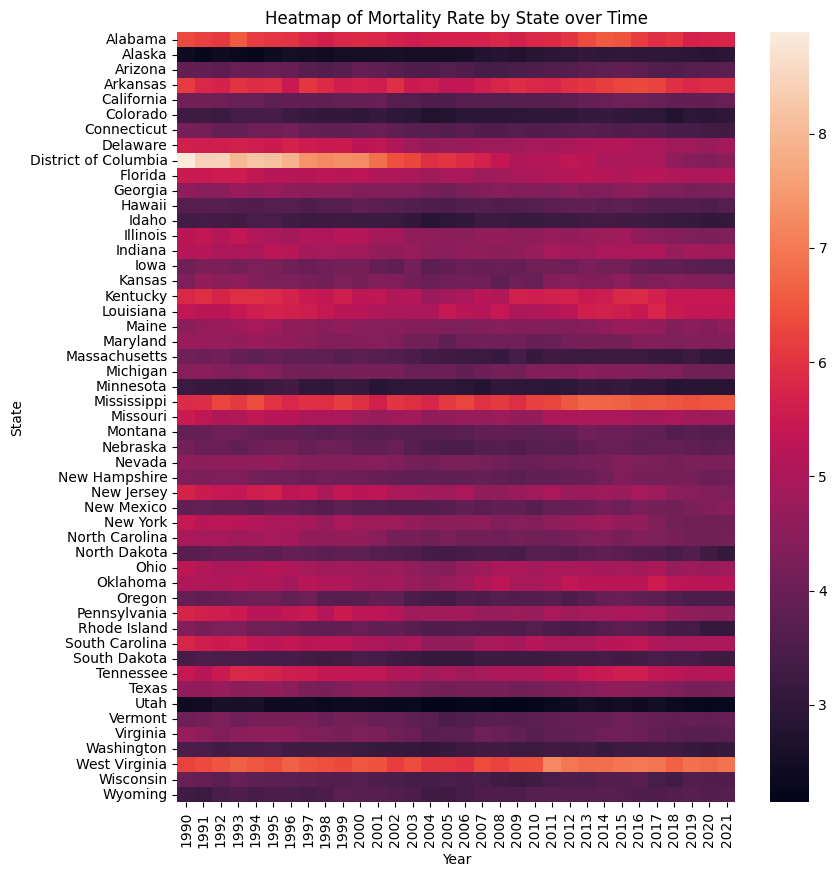

In [56]:
# MORTALITY RATE BY STATE OVER TIME
query = "SELECT state, year, mort_rate FROM data ORDER BY year ASC;"
mort_rates = pd.read_sql(query, con)

plt.figure(figsize=(9, 10))
sns.heatmap(mort_rates.pivot(index='state', columns=['year'], values='mort_rate'))
plt.title('Heatmap of Mortality Rate by State over Time')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

### Effects of Pap Smear Tests

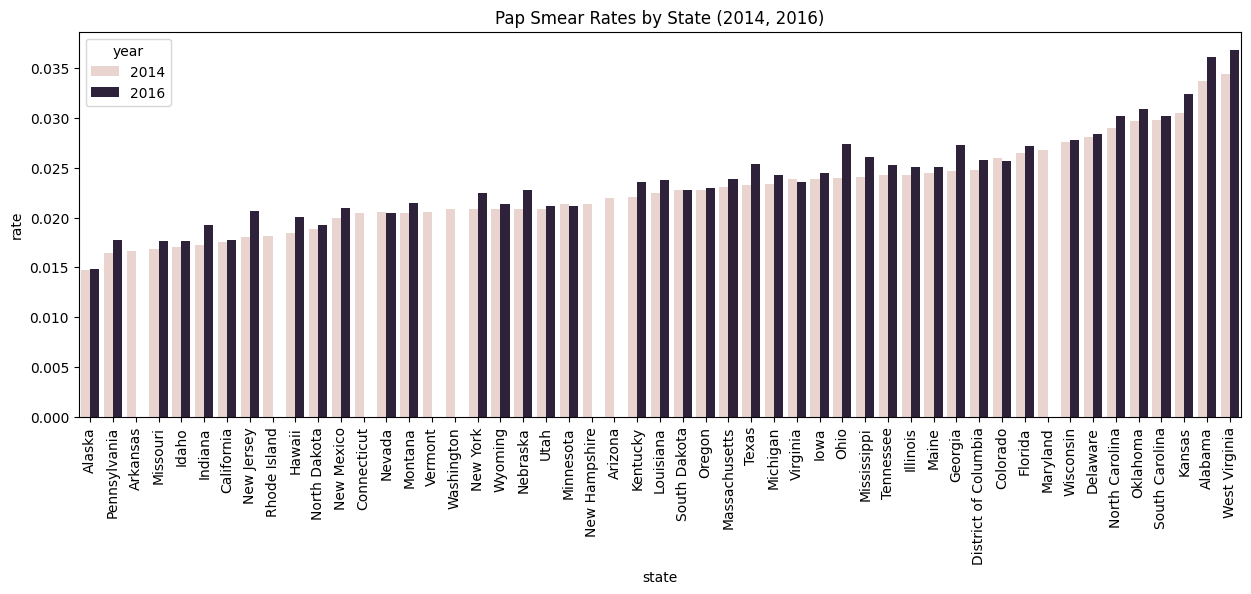

In [102]:
# PAP SMEAR RATES BY STATE OVER TIME
query = "SELECT state, city, year, (val / pop_2010) AS rate FROM pap GROUP BY year, state ORDER BY AVG(rate) ASC"
pap_rates = pd.read_sql_query(query, con)

plt.figure(figsize=(15, 5))
plt.title("Pap Smear Rates by State (2014, 2016)")
sns.barplot(pap_rates.sort_values('rate'), x="state", y="rate", hue="year", legend=True)
plt.xticks(rotation='vertical')
plt.show()

### Effects of HPV Vaccines

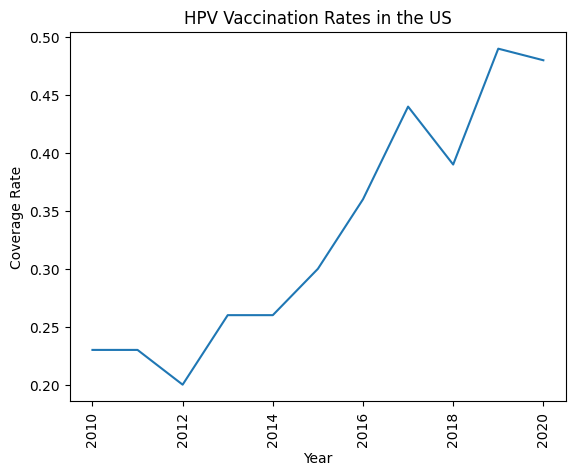

In [58]:
# HPV VACCINATION COVERAGE IN THE US OVER TIME
query = "SELECT year, current_cov FROM hpv ORDER BY year ASC"
curr_cov = pd.read_sql_query(query, con)

plt.title("HPV Vaccination Rates in the US")
plt.xlabel('Year')
plt.ylabel('Coverage Rate')
plt.plot(curr_cov['year'], curr_cov['current_cov'])
plt.xticks(rotation='vertical')
plt.show()

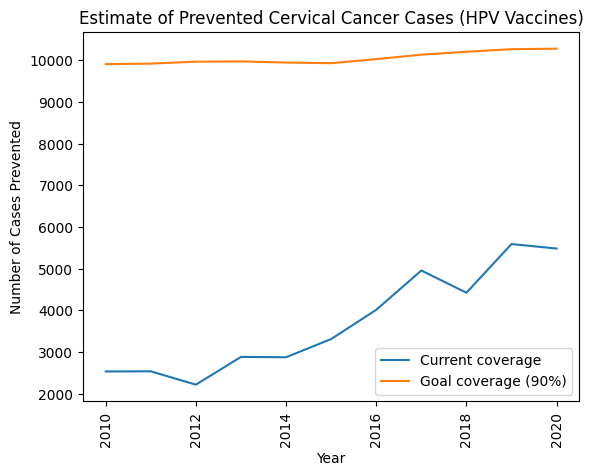

In [80]:
# CASES PREVENTED IN THE US
query = "SELECT year, curr_cc_prev, proj_cc_prev FROM hpv ORDER BY year ASC"
cc_prev = pd.read_sql_query(query, con)

plt.title("Estimate of Prevented Cervical Cancer Cases (HPV Vaccines)")
plt.xlabel('Year')
plt.ylabel('Number of Cases Prevented')
plt.plot(cc_prev['year'], cc_prev['curr_cc_prev'], label="Current coverage")
plt.plot(cc_prev['year'], cc_prev['proj_cc_prev'], label="Goal coverage (90%)")
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

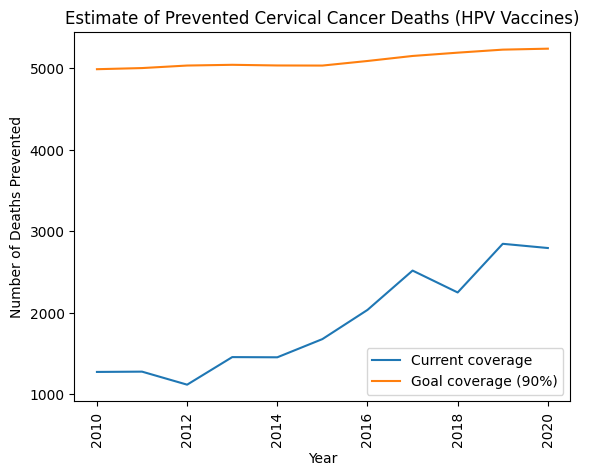

In [81]:
# DEATHS PREVENTED IN THE US
query = "SELECT year, curr_mort_prev, proj_mort_prev FROM hpv ORDER BY year ASC"
cc_prev = pd.read_sql_query(query, con)

plt.title("Estimate of Prevented Cervical Cancer Deaths (HPV Vaccines)")
plt.xlabel('Year')
plt.ylabel('Number of Deaths Prevented')
plt.plot(cc_prev['year'], cc_prev['curr_mort_prev'], label="Current coverage")
plt.plot(cc_prev['year'], cc_prev['proj_mort_prev'], label="Goal coverage (90%)")
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

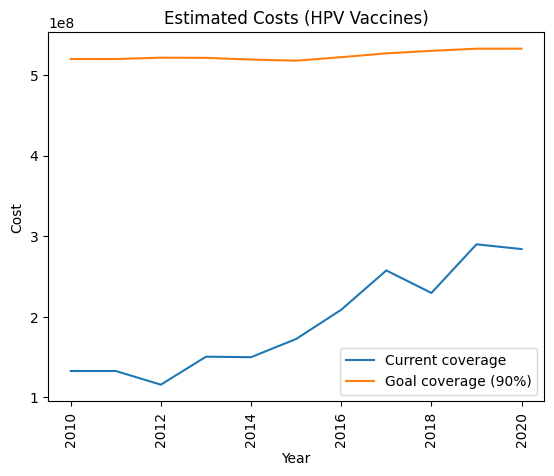

In [82]:
# COSTS IN THE US
query = "SELECT year, curr_cost, proj_cost FROM hpv ORDER BY year ASC"
costs = pd.read_sql_query(query, con)

plt.title("Estimated Costs (HPV Vaccines)")
plt.xlabel('Year')
plt.ylabel('Cost')
plt.plot(costs['year'], costs['curr_cost'], label="Current coverage")
plt.plot(costs['year'], costs['proj_cost'], label="Goal coverage (90%)")
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

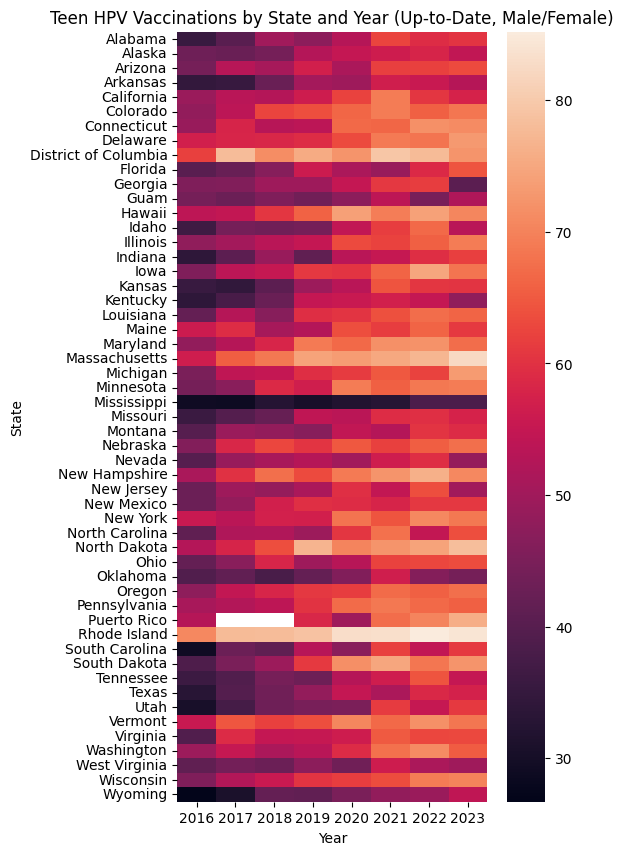

In [106]:
# ADOLESCENT VACCINATIONS BY STATE OVER TIME
query = "SELECT state, year, val FROM adolescent WHERE dose = 'Up-to-Date, Males and Females' ORDER BY year, state ASC"
teen_vacc = pd.read_sql_query(query, con)

plt.figure(figsize=(5, 10))
plt.title("Teen HPV Vaccinations by State and Year (Up-to-Date, Male/Female)")
sns.heatmap(teen_vacc.pivot(index='state', columns=['year'], values='val'))
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

In [107]:
con.close()